# Step 1. Import libraries

In [1]:
import numpy as np              # For numerical operations and handling arrays
import pandas as pd             # For working with data frames and datasets
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns           # For statistical data visualization (built on matplotlib)
from sklearn import datasets, model_selection, metrics  # For machine learning datasets, model selection, and evaluation metrics

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier

# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier  # For random forest classifier

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression  # For logistic regression classifier

# Import various tools from sklearn.model_selection
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning with cross-validation

# Import SelectFromModel for feature selection
from sklearn.feature_selection import SelectFromModel  # For automatic feature selection

# Import various evaluation metrics from sklearn.metrics
from sklearn.metrics import classification_report  # For detailed classification report
from sklearn.metrics import confusion_matrix  # For confusion matrix
from sklearn.metrics import accuracy_score  # For accuracy score calculation
from sklearn.metrics import roc_curve, auc  # For ROC curve and AUC calculation

# Step 2. Import the dataset

In [2]:
# Import the data
df = pd.read_csv('Dataset/US_Accidents_March23.csv')

In [3]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

# Step 3. Extract year, month, day, hour, weekday, and time to clear accidents

In [6]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [7]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,Night,Night,Night,Night,2016.0,Feb,8.0,5.0,Mon,314.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,Night,Night,Night,Day,2016.0,Feb,8.0,6.0,Mon,30.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,Night,Night,Day,Day,2016.0,Feb,8.0,6.0,Mon,30.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,Night,Day,Day,Day,2016.0,Feb,8.0,7.0,Mon,30.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,Day,Day,Day,Day,2016.0,Feb,8.0,7.0,Mon,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,Day,Day,Day,Day,2019.0,Aug,23.0,18.0,Fri,29.0
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,Day,Day,Day,Day,2019.0,Aug,23.0,19.0,Fri,27.0
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,Day,Day,Day,Day,2019.0,Aug,23.0,19.0,Fri,28.0
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,Day,Day,Day,Day,2019.0,Aug,23.0,19.0,Fri,29.0


# Step 4. Deal with outliers
A. Drop rows with negative time_duration

In [8]:
# Check if there is any negative time_duration values
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

# Step 4. Deal with outliers
B. Fill outliers with median values

In [9]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)

df.info()

C:\Users\Ak114\AppData\Local\Temp\ipykernel_15796\167098401.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[outliers] = np.nan
C:\Users\Ak114\AppData\Local\Temp\ipykernel_15796\167098401.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[td].fillna(median, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               float64       
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [10]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 39753.0 minutes or 663 hours or 28 days; Min to clear an accident td: 1.0 minutes.


# Step 5. Select a list of features for machine learning algorithms
Only select relavant columns without overwhelming the computer

In [11]:
# Set the list of features to include in Machine Learning
feature_lst=['Source','Severity','Start_Lng','Start_Lat','Distance(mi)','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [12]:
feature_lst

['Source',
 'Severity',
 'Start_Lng',
 'Start_Lat',
 'Distance(mi)',
 'City',
 'County',
 'State',
 'Timezone',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Hour',
 'Weekday',
 'Time_Duration(min)']

In [13]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   Severity            float64
 2   Start_Lng           float64
 3   Start_Lat           float64
 4   Distance(mi)        float64
 5   City                object 
 6   County              object 
 7   State               object 
 8   Timezone            object 
 9   Temperature(F)      float64
 10  Humidity(%)         float64
 11  Pressure(in)        float64
 12  Visibility(mi)      float64
 13  Wind_Direction      object 
 14  Weather_Condition   object 
 15  Amenity             object 
 16  Bump                object 
 17  Crossing            object 
 18  Give_Way            object 
 19  Junction            object 
 20  No_Exit             object 
 21  Railway             object 
 22  Roundabout          object 
 23  Station             object 
 24  Stop                obje

# Step 6. Drop rows with missing values

In [14]:
# Check missing values
df_sel.isnull().mean()

Source                0.000620
Severity              0.000620
Start_Lng             0.000620
Start_Lat             0.000620
Distance(mi)          0.000620
City                  0.000652
County                0.000620
State                 0.000620
Timezone              0.001630
Temperature(F)        0.021808
Humidity(%)           0.023139
Pressure(in)          0.018815
Visibility(mi)        0.023521
Wind_Direction        0.023267
Weather_Condition     0.023050
Amenity               0.000620
Bump                  0.000620
Crossing              0.000620
Give_Way              0.000620
Junction              0.000620
No_Exit               0.000620
Railway               0.000620
Roundabout            0.000620
Station               0.000620
Stop                  0.000620
Traffic_Calming       0.000620
Traffic_Signal        0.000620
Turning_Loop          0.000620
Sunrise_Sunset        0.003612
Hour                  0.096780
Weekday               0.096780
Time_Duration(min)    0.000000
dtype: f

In [15]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(6723955, 32)

# Step 7. Select the state of interest: PA; and County of interest: Montgomery
Due to the limitation of personal laptop, the whole US dataset is too big to handle

In [16]:
# Set state
state='PA'

# Select the state of Pennsylvania
df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252149 entries, 197860 to 7727994
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Source              252149 non-null  object 
 1   Severity            252149 non-null  float64
 2   Start_Lng           252149 non-null  float64
 3   Start_Lat           252149 non-null  float64
 4   Distance(mi)        252149 non-null  float64
 5   City                252149 non-null  object 
 6   County              252149 non-null  object 
 7   Timezone            252149 non-null  object 
 8   Temperature(F)      252149 non-null  float64
 9   Humidity(%)         252149 non-null  float64
 10  Pressure(in)        252149 non-null  float64
 11  Visibility(mi)      252149 non-null  float64
 12  Wind_Direction      252149 non-null  object 
 13  Weather_Condition   252149 non-null  object 
 14  Amenity             252149 non-null  object 
 15  Bump                252149 non-nu

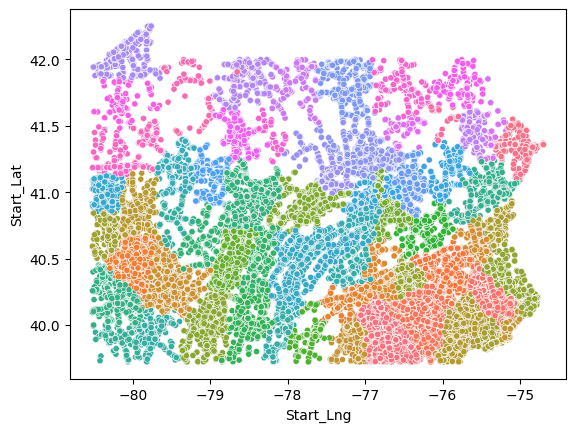

In [17]:
# Map of accidents, color code by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [18]:
# Set county
county='Montgomery'

# Select the state of Pennsylvania
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59372 entries, 228548 to 7727507
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              59372 non-null  object 
 1   Severity            59372 non-null  float64
 2   Start_Lng           59372 non-null  float64
 3   Start_Lat           59372 non-null  float64
 4   Distance(mi)        59372 non-null  float64
 5   City                59372 non-null  object 
 6   Timezone            59372 non-null  object 
 7   Temperature(F)      59372 non-null  float64
 8   Humidity(%)         59372 non-null  float64
 9   Pressure(in)        59372 non-null  float64
 10  Visibility(mi)      59372 non-null  float64
 11  Wind_Direction      59372 non-null  object 
 12  Weather_Condition   59372 non-null  object 
 13  Amenity             59372 non-null  object 
 14  Bump                59372 non-null  object 
 15  Crossing            59372 non-null  object 
 16  Gi

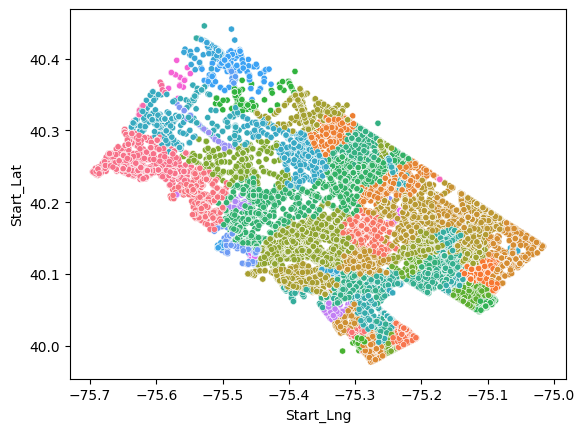

In [19]:
# Map of accidents, color code by city

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

# Step 8. Deal with categorical data: pd.get_dummies()

In [20]:
# Generate dummies for categorical data
df_county_dummy = pd.get_dummies(df_county,drop_first=True)
df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59372 entries, 228548 to 7727507
Columns: 176 entries, Severity to Weekday_Wed
dtypes: bool(166), float64(10)
memory usage: 14.4 MB


In [21]:
df_county_dummy

,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Hour,Time_Duration(min),...,Stop_True,Traffic_Calming_True,Traffic_Signal_True,Sunrise_Sunset_Night,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
228548,2.0,-75.647789,40.301609,0.010,57.0,100.0,29.74,8.0,14.0,130.0,...,False,False,False,False,False,False,False,False,False,True
228549,2.0,-75.521545,40.198135,0.010,55.9,100.0,29.74,3.0,16.0,47.0,...,False,False,True,False,False,False,False,False,False,True
228550,2.0,-75.292030,40.019108,0.000,55.4,100.0,29.72,2.5,16.0,62.0,...,True,False,False,False,False,False,False,False,False,True
228551,2.0,-75.281288,40.152294,0.000,55.4,100.0,29.72,2.5,16.0,45.0,...,False,False,False,False,False,False,False,False,False,True
228552,2.0,-75.273857,40.144039,0.010,55.4,100.0,29.72,2.5,16.0,30.0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714387,2.0,-75.321740,40.070409,1.920,69.0,78.0,29.84,10.0,20.0,29.0,...,False,False,False,True,False,False,False,True,False,False
7720012,2.0,-75.294850,40.109540,5.645,74.0,95.0,29.58,5.0,8.0,29.0,...,False,False,False,False,False,False,False,False,True,False
7721167,2.0,-75.220247,40.127177,0.657,82.0,50.0,29.47,10.0,12.0,29.0,...,False,False,False,False,False,False,False,False,False,False
7726948,2.0,-75.285835,40.131019,0.000,77.0,89.0,29.56,10.0,18.0,29.0,...,False,False,False,False,False,False,False,False,False,True


# Step 9. Predict the accident severity with various supervised machine learning algorithms
Data preparation: train_test_split

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assign the data
df = df_county_dummy  
target = 'Severity'  # Set the target variable

# Set X (features) and y (target)
X = df.drop(target, axis=1)
y = df[target]

# Standardize the features for applicable models
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 1: Split the dataset into training (75%) and remaining (25%) data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.25, random_state=21)

# Step 2: Split the remaining data (25%) into validation (15%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.4, random_state=21)  # 40% of 25% is 10%

# List of algorithms
algo_lst = [
    'Logistic Regression', 
    'K-Nearest Neighbors', 
    'Decision Trees', 
    'Random Forest',   
    'Naive Bayes'
]

# Initialize accuracy and metric lists
accuracy_lst = []
metrics_lst = []
results = []

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 500]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Trees': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    # 'SVM': {
    #     'C': [0.1, 1, 10, 100],
    #     'kernel': ['linear', 'rbf', 'poly'],      # I did train the model continues but our system not capable to perform it.
    #     'gamma': ['scale', 'auto']
    # },
    # 'Gradient Boosting': {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.01, 0.1, 0.2],
    #     'max_depth': [3, 5, 7],
    #     'min_samples_split': [2, 5, 10]
    # },
    'Naive Bayes': {
    'var_smoothing': [1e-12, 1e-9, 1e-6, 1e-3]
}

}

# Loop through each algorithm and tune parameters
for algo in algo_lst:
    print(f"Tuning {algo}...")
    
    # Get the model
    if algo == 'Logistic Regression':
        model = LogisticRegression()
    elif algo == 'K-Nearest Neighbors':
        model = KNeighborsClassifier()
    elif algo == 'Decision Trees':
        model = DecisionTreeClassifier()
    elif algo == 'Random Forest':
        model = RandomForestClassifier()
    # elif algo == 'SVM':
    #     model = SVC(probability=True)           
    # elif algo == 'Gradient Boosting':
    #     model = GradientBoostingClassifier()
    elif algo == 'Naive Bayes':
        model = GaussianNB()
        model.fit(X_train, y_train)  # Directly fit for Naive Bayes as it has no hyperparameters
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        metrics_lst.append((accuracy, precision, recall, f1))
        results.append({"Algorithm": algo, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1})
        print(f"Validation Accuracy for {algo}: {accuracy:.2f}")
        continue

    # Use GridSearchCV or RandomizedSearchCV
    grid_search = RandomizedSearchCV(
        model, param_grids[algo], n_iter=20, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=21
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the validation set
    y_pred = best_model.predict(X_val)

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    metrics_lst.append((accuracy, precision, recall, f1))
    results.append({"Algorithm": algo, "Best Params": grid_search.best_params_, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1})

    print(f"Best parameters for {algo}: {grid_search.best_params_}")
    print(f"Validation Accuracy for {algo}: {accuracy:.2f}")

Tuning Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'solver': 'lbfgs', 'max_iter': 100, 'C': 0.1}
Validation Accuracy for Logistic Regression: 0.94
Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\Ak114\Desktop\TechStax\env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Validation Accuracy for K-Nearest Neighbors: 0.94
Tuning Decision Trees...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Decision Trees: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Validation Accuracy for Decision Trees: 0.95
Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Validation Accuracy for Random Forest: 0.96
Tuning Naive Bayes...
Validation Accuracy for Naive Bayes: 0.04


c:\Users\Ak114\Desktop\TechStax\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Display final accuracies and metrics as a DataFrame
results_df = pd.DataFrame(results)
print("\nFinal Metrics:")
print(results_df)


Final Metrics:
             Algorithm                                        Best Params  \
0  Logistic Regression     {'solver': 'lbfgs', 'max_iter': 100, 'C': 0.1}   
1  K-Nearest Neighbors  {'weights': 'distance', 'n_neighbors': 9, 'met...   
2       Decision Trees  {'min_samples_split': 2, 'min_samples_leaf': 4...   
3        Random Forest  {'n_estimators': 50, 'min_samples_split': 10, ...   
4          Naive Bayes                                                NaN   

   Accuracy  Precision    Recall  F1-Score  
0  0.942504   0.929129  0.942504  0.931869  
1  0.940034   0.927020  0.940034  0.929994  
2  0.952162   0.944159  0.952162  0.946754  
3  0.955867   0.945363  0.955867  0.946162  
4  0.036384   0.920101  0.036384  0.048498  


# RandomForestClassifier

In [36]:
# Define the model with specified hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=50,               # Number of trees
    min_samples_split=10,          # Minimum samples to split
    min_samples_leaf=1,            # Minimum samples at leaf nodes
    max_depth=None,                # No upper limit on tree depth
    criterion='entropy'            # Split based on entropy (information gain)
)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = random_forest_model.predict(X_val)

# Calculate accuracy on validation set
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.96


# Steps 10 to Dump the Random Forest Model

In [37]:
import joblib

# Save the model to a file
joblib.dump(random_forest_model, 'random_forest_model_specific.pkl')
print("Random Forest model with specific parameters has been saved successfully!")

Random Forest model with specific parameters has been saved successfully!


# Steps 11 to Load the Dumped Model

In [39]:
# Load the Random Forest model
loaded_rf_model = joblib.load('random_forest_model_specific.pkl')

# Use the model for predictions
y_test_pred = loaded_rf_model.predict(X_test)

print("Random Forest model loaded successfully and predictions are ready!")

Random Forest model loaded successfully and predictions are ready!


# Test 

In [46]:
y_test_pred

array([2., 2., 2., ..., 2., 2., 2.], shape=(5938,))

# versions

In [50]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import seaborn as sns

# Print the versions
print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")  
print(f"scikit-learn Version: {sklearn.__version__}")
print(f"Seaborn Version: {sns.__version__}")  


Python Version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Pandas Version: 2.2.3
NumPy Version: 2.2.1
Matplotlib Version: 3.10.0
scikit-learn Version: 1.6.1
Seaborn Version: 0.13.2
